Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [ ]:
NOM = "Martinez Almoyna"
PRENOM = "Maud"
GROUPE = "3"
DATE = "27/02/2019"

---

# TP 6 : Debugging et révisions

Les exercices ci-dessous sont des reprises des exercices précédents, avec un code solution fourni avec le sujet mais buggué... A vous de les faire fonctionner !

## Exercice 1: Troisième loi de Kepler  (d'après TP4 exercice 7)


**Un code solution mais buggué est proposé ci-dessous. Copiez-le dans la cellule réponse et faites le fonctionner pour qu'il réponde aux questions ci-dessous.**


Dans le tableau en fin d'exercice sont donnés la période de révolution $T$ et le demi grand-axe $a$ de l'orbite des planètes du système solaire. Les incertitudes sur ces données sont de l'ordre du dernier chiffre significatif.

1.        Rentrer les données de chacune des colonnes dans des listes, et créer des listes pour leurs incertitudes
2.     Tracer le demi grand axe $a$ en fonction de $T$ sous forme de points avec barres d'erreur
3.     Créer une fonction qui renvoie $T^2/a^3$, et une deuxième fonction qui renvoie l'incertitude sur ce nombre (en propageant les incertitudes sur $a$ et $T$ )
4.     Tracer $T^2/a^3$ en fonction du numéro de la planète, sous forme de points avec barres d'erreur. Superposer la droite théorique attendue $T^2/a^3=1$ et commenter.
5.     Les points d'un cercle de rayon $r$ et centre O ont pour coordonnées cartésiennes $x=r\cos\theta$ et $y=r\sin\theta$ pour $\theta \in [0,2\pi]$. Définir une fonction qui convertit les coordonnées polaires $(r,\theta)$ d'un point du cercle en coordonnées cartésiennes $(x,y)$. On définira donc une fonction à deux arguments qui renvoie deux valeurs, ou une liste de valeurs.
6.     Tracer les orbites de chacune des planètes dans un plan gradué en UA : c'est un système solaire à l'échelle !

| Planète|	$T$ [années] |	$a$ [UA]  
|---|---|---|
|Mercure |	0.2408 |	0.3871 
|Vénus |	0.6152 |	0.7233 
|Terre |	1.000 |	1.000 
|Mars |	1.8808 |	1.5237 
|Jupiter |	11.862 |	5.2026 
|Saturne |	29.457 |	9.5547 
|Uranus |	84.020 |	19.218 
|Neptune |	164.77 |	30.109     

```python
#Loi de Kepler
from math import cos,sin,pi
from matplotlib import pyplot

# return le demi grand-axe a en fonction de la periode T
def kepler(T):
    a_th=[]      
    for t in T:
        a_th.append(pow(t,2.0/3.0))  
    return a_th

# propage l'incertitude sur T sur a
def propagation_incertitude(T,a,T_err):
    a_err=[]
    for i in range(T.size):   
        a_err.append(2.0/3.0*a(i)/T[i]*T_err[i])  
    return a_err

# trace les orbites
def systeme_solaire(a):
    fig = pyplot.figure()
    N=100 #nombre de pas angulaire
    theta=[2*pi/float(N)*float(i) for i in range(N)]    
    for r in a:
        xx=[r*cos(th) for th in theta]
        yy=[r*sin(th) for th in theta]
        pyplot.plot(xx,yy,'b')
    pyplot.xlabel('x (unites astronomiques)')
    pyplot.ylabel('y (unites astronomiques)')
    pyplot.show()
    return
        

T=[0.2408,0.6152,1.000,1.8808,11.862,29.457,84.020,164.77]
a=[0.3871,0.7233,1.000,1.5237,5.2026,9.5547,192.18,30.109]  
a_th=kepler(T)

T_err=[0.0001 for p in range(T.size)]  
a_err=propagation_incetitude(T,a,T_err)  
 
fig = pyplot.figure(1)
pyplot.errobar( T, a, xerr=T_err, yerr= a_err, marker='.', color='r',linestyle='None',label='Mesures')  
pyplot.plot(T,a_th,color='b',label='Theorie')
pyplot.xlabel('T (annees)')
pyplot.ylabel('a (unites astronomiques)')
pyplot.title('Verification de la Loi de Kepler')
pyplot.grid(True) 
pyplot.show()
 
systeme_solaire(2,a)  

n = np.arange(len(a))
fig = plt.figure(3)
pyplot.errorbar(n, T**2/a**3, xerr=T_err, yerr=a_err, marker='.', color='r',linestyle='None',label='Mesures')
pyplot.plot(n,np.ones(len(a)),label='Théorie')
pyplot.xlabel('Planetes')
pyplot.ylabel('$T^2/a^3$')
pyplot.legend()
pyplot.show()
```

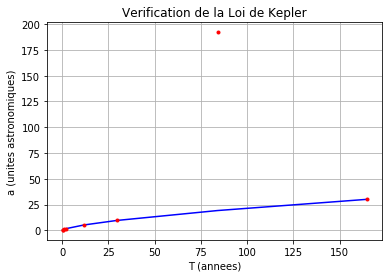

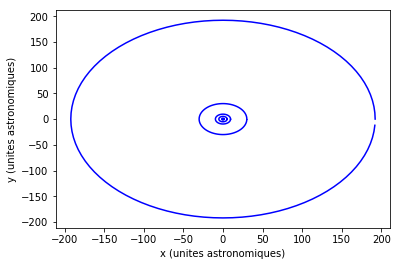

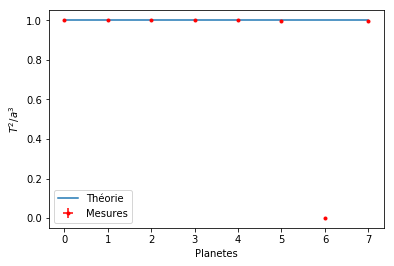

In [25]:
import numpy as np

#Loi de Kepler
from math import cos,sin,pi
from matplotlib import pyplot

# return le demi grand-axe a en fonction de la periode T
def kepler(T):
    a_th=[]      
    for t in T:
        a_th.append(pow(t,2.0/3.0))  
    return a_th

# propage l'incertitude sur T sur a
def propagation_incertitude(T,a,T_err):
    a_err=[]
    for i in range(len(T)):   
        a_err.append(2.0/3.0*a[i]/T[i]*T_err[i])  
    return a_err

# trace les orbites
def systeme_solaire(a):
    fig = pyplot.figure()
    N=100 #nombre de pas angulaire
    theta=[2*pi/float(N)*float(i) for i in range(N)]    
    for r in a:
        xx=[r*cos(th) for th in theta]
        yy=[r*sin(th) for th in theta]
        pyplot.plot(xx,yy,'b')
    pyplot.xlabel('x (unites astronomiques)')
    pyplot.ylabel('y (unites astronomiques)')
    pyplot.show()
    return


T=[0.2408,0.6152,1.000,1.8808,11.862,29.457,84.020,164.77]
a=[0.3871,0.7233,1.000,1.5237,5.2026,9.5547,192.18,30.109]  
a_th=kepler(T)

T_err=[0.0001 for p in range(len(T))]  
a_err=propagation_incertitude(T,a,T_err)  

fig = pyplot.figure(1)
pyplot.errorbar( T, a, xerr=T_err, yerr= a_err, marker='.', color='r',linestyle='None',label='Mesures')  
pyplot.plot(T,a_th,color='b',label='Theorie')
pyplot.xlabel('T (annees)')
pyplot.ylabel('a (unites astronomiques)')
pyplot.title('Verification de la Loi de Kepler')
pyplot.grid(True) 
pyplot.show()

systeme_solaire(a) 




n = np.arange(len(a))
fig = pyplot.figure(3)
pyplot.errorbar(n, np.array(T)**2/np.array(a)**3, xerr=T_err, yerr=a_err, marker='.', color='r',linestyle='None',label='Mesures')
pyplot.plot(n,np.ones(len(a)),label='Théorie')
pyplot.xlabel('Planetes')
pyplot.ylabel('$T^2/a^3$')
pyplot.legend()
pyplot.show()

## Exercice 2:  Au clair de la Lune (d'après TP5 exercice 7)



**Un code solution mais buggué est proposé ci-dessous. Copiez-le dans la cellule réponse et faites le fonctionner pour qu'il réponde aux questions ci-dessous.**


Le troisième la d'un piano est le son émis par le diapason. La frappe de ce la fait vibrer la corde correspondante
du piano à une fréquence de $440$Hz : c'est le nombre d'oscillations par seconde de la corde.
Mathématiquement, cette oscillation peut être représentée par un sinus évoluant dans le temps
$$
s(t) \ = \ A \, sin (2 \pi f t),$$
où $A$ est l'amplitude, $f$ est la fréquence. La qualité d'un CD est donnée par $44100$ échantillons par seconde.
Il est possible d'avoir d'autres taux d'échantillonnage. Nous noterons $r$ le nombre d'échantillons. On peut
donc calculer de manière discrète $s(t)$
$$
s_r \ = \ A \, sin \left(2 \pi f \frac{n}{r}\right),
$$
pour $n=0, ..., r.length$, où $length$ est le nombre de secondes où le son est émis.




1. Ecrire une fonction `note` qui renvoie le sinus échantillonné. La fonction prendra en paramètres la fréquence,
la durée de la note en seconde, l'amplitude et le nombre d'échantillons qui seront mis par défaut à $1$ et à
$44100$.

2. Soit un piano virtuel avec $88$ touches. La $49$ème touche est le la à $440Hz$. La fréquence des autres touches
peut être calculée à l'aide de la formule suivante
$$
K_n \ = \ K_{49} \, 2^{\frac{n-49}{n}}
$$
où $K_{49}= 440$ et  $n$ est le numéro de la touche. Ecrire une fonction `touche` qui retourne $K_n$.

3. Ecrire une fonction qui joue "au clair de la lune"   sachant que les touches pour la mélodie sont
$$
[52, 52, 52, 54, 56, 54, 52, 56, 54, 54, 52, 52, 52, 52, 54, 56, 54, 52, 56, 54, 54, 52,
$$
$$
54, 54, 54, 54, 49, 49, 54, 52, 51, 49, 47, 52, 52, 52, 54, 56, 54, 52, 56, 54, 54, 52]
$$

On concaténera les notes en utilisant la fonction `concatenate` de numpy et on sauvegardera la mélodie
au format `wav` en utilisant le module `wavefile` de `scipy` dont voici un exemple d'utilisation :

```python
import numpy as np
import scipy.io.wavfile as wav
song = note(440, 1.)
scaled = np.int16(song/np.max(np.abs(song))*32767)
wav.write('test.wav', 44100, scaled)
```

On propose le programme suivante:
```python
import numpy as np
from matlplotlib import pyplot    
import scipy.io.wavfile as wav

# retourne un sinus echantillonne de frequence f
# de longueur duree (en seconde) d'amplitude a
# et echantillone en r points par seconde
def note(f,duree,a=1,r=44100):
    t = np.linespace(0,duree,r*duree)   
    sr = a*np.sin(2*pi*f*t)     
    return sr

# retourne la frequence d'une note en fonction
# du numero de touche de piano n
def touche(n,K49=440):
    K = K49*pow(2,float(n-49)/12)
    return K


partition = [52,52,52,54,65,54,52,56,54,54,52,52,52,52,54,56,54,52,54,54,52,54,54,54,54,49,49,54,52,51,49,47,52,52,52,54,56,54,52,56,54,54,52] 

f = 440
duree = 0.2
taux_echantillonnage = 44100

melodie = np.zeros(1,)

for p in partition:
    f_touche = touche(p)
    #print(f_touche)
    sr = note(f_touche,duree,r=taux_echantilonnage)  
    melodie = np.concatenate((melodie,sr))

scaled = np.int16(melodie/np.max(np.abs(melodie))*32767)
wav.write('test.wav',44100,scaled)
```



In [33]:
import numpy as np
from matplotlib import pyplot    
import scipy.io.wavfile as wav

# retourne un sinus echantillonne de frequence f
# de longueur duree (en seconde) d'amplitude a
# et echantillone en r points par seconde
def note(f,duree,a=1,r=44100):
    t = np.linspace(0,duree,int(r*duree))   
    sr = a*np.sin(2*pi*f*t)     
    return sr

# retourne la frequence d'une note en fonction
# du numero de touche de piano n
def touche(n,K49=440):
    K = K49*pow(2,float(n-49)/12)
    return K


partition = [52,52,52,54,65,54,52,56,54,54,52,52,52,52,54,56,54,52,54,54,52,54,54,54,54,49,49,54,52,51,49,47,52,52,52,54,56,54,52,56,54,54,52] 

f = 440
duree = 0.2
taux_echantillonnage = 44100

melodie = np.zeros(1,)

for p in partition:
    f_touche = touche(p)
    #print(f_touche)
    sr = note(f_touche,duree,r=taux_echantillonnage)  
    melodie = np.concatenate((melodie,sr))

scaled = np.int16(melodie/np.max(np.abs(melodie))*32767)
wav.write('test.wav',44100,scaled)



## Exercice 3:  Premier cryptage (d'après TP2 exercice 13)


**Un code solution mais buggué est proposé ci-dessous. Copiez le dans la cellule réponse et faites le fonctionner pour qu'il réponde aux questions ci-dessous.**

On demandait d'écrire un programme qui :
1. demande à l'utilisateur de rentrer un texte,
2. crée une première chaîne de caractères avec les éléments en position paire. 
3. crée une deuxième chaîne de caractères avec les éléments en position impaire. 
4. crée une variable qui concatène ces deux listes et l'affiche. 

Pour effectuer toutes ses tâches, on propose le programme suivant:

```python
# TP6 exercice 1

# chaine a crypter:
s=input('entrer un texte pour finir validez par entree ')

# pour la suite si la longueur est impaire on rajoute un espace
if len(s)%2 !=1 :  
       s=s+' '

# les chaines paires et impaires
sp=s[::2]
si=s[1::2]
print('texte initial:\n',sp)  
sc=sp+si
print('texte code\n',sc)

# decodage sc=sp+si
n=len(sc)
n=int(n/2)
# moitie gauche
sg=sc[:n]
# moitie droite
sd=sc[n+1:]                 
sf=''
for c, x in enumerate(sg) :
       sf=sf+sg[c]+sd[c]
print('texte decode: ',sf)


```



In [36]:
# TP6 exercice 1

# chaine a crypter:
s=input('entrer un texte pour finir validez par entree ')

# pour la suite si la longueur est impaire on rajoute un espace
if len(s)%2 !=1 :  
       s=s+' '

# les chaines paires et impaires
sp=s[::2]
si=s[1::2]
print('texte initial:\n',s)  
sc=sp+si
print('texte code\n',sc)

# decodage sc=sp+si
n=len(sc)
n=int(n/2)
# moitie gauche
sg=sc[:n]
# moitie droite
sd=sc[n+1:]                 
sf=''
for c, x in enumerate(sg) :
       sf=sf+sg[c]+sd[c]
print('texte decode: ',sf)

entrer un texte pour finir validez par entree vacances
texte initial:
 vacances 
texte code
 vcne aacs
texte decode:  vacances


## Exercice 4

Définir et tracer les fonctions suivantes : 

$g(x,y)=2A+x^2+y^2-A(cos(2\pi x)+cos(2\pi y))$
pour x dans $[-5,5]$ et y dans $[-5,5] $. On pourra prendre A=10.


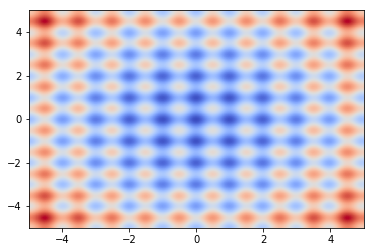

In [44]:
import numpy as np
from matplotlib import pyplot

#Fonction G
def g(x,y, A):
    return 2*A + x**2 + y**2 - A*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
X,Y=np.meshgrid(x,y)

G=g(X,Y,10)

pyplot.pcolormesh(X,Y,G, cmap="coolwarm")
pyplot.show()


## Exercice 5

La fonction de Bessel d'ordre n $J_n(x)$ peut être approchée en sommant les K premiers termes de la série: 

$J_n(x)=\sum_{p=0}^{\infty} \frac{(-1)^p}{p!(n+p)!}(x/2)^{2p+n}$

- Définir une fonction $Besselserie(x,n,K)$ qui calcule une approximation de $J_n(x)$ en sommant les K premiers termes de la série (K>12). 

- Tracer sur un même graphe les fonctions de Bessel approchées d'ordre n=0,1 et 2 et pour x appartenant à l'intervalle $[0,10]$.

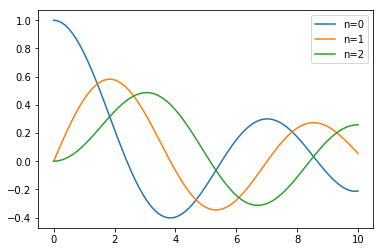

In [54]:
from matplotlib import pyplot
import numpy as np
import math

#Fonction Bessel
def Bessel(x, n, K) :
    J= 0
    for p in range(0, K+1):
        J += (((-1)**p)/(math.factorial(p)*math.factorial(n+p)))*(x/2)**(2*p+n)
    return J


x=np.linspace(0,10,100)
y0=Bessel(x, 0, 12)
y1=Bessel(x, 1, 12)
y2=Bessel(x, 2, 12)

#Trace la fonction
fig = pyplot.figure()
pyplot.plot(x,y0, label='n=0')
pyplot.plot(x,y1, label='n=1')
pyplot.plot(x,y2, label='n=2')
pyplot.legend()
pyplot.show()



 Pour réviser

Faire ou refaire les exercices 6 et 7 du TD3, 4 du TD4 et 6 du TP5 en priorité. Puis les autres exercices.


Enfin vous pouvez aussi résoudre des défis sur la page du projet Euler https://projecteuler.net/. Une (longue) série de jeux mathématiques à résoudre à l'aide petits programmes (environ 5 lignes) est proposée. Les problèmes sont rangés par ordre de difficulté croissante dans la page `Archives`. Les premiers sont tout à fait à votre portée. Si vous souhaitez participer, rajoutez-moi dans vos `Friends` à l'aide de la clé `1271675_E2HzEOc72smbozal1AJ0VZqEkyejKGhZ`